# Machine Learning - Unsupervised Learning - Dataset1

## 1. Import Modules

In [394]:
# Basic Modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

# Data Related Modules
import pandas as pd

# Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Processing - Splitting Test / Train Data
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# MLP Neural Network
from sklearn.neural_network import MLPClassifier

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# SVM
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Validating the Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, homogeneity_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error

# Optimization
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Cluster
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Dimensionality Reduction
from sklearn.decomposition import PCA, FastICA as ICA, TruncatedSVD as SVD
from sklearn.random_projection import GaussianRandomProjection as RP

## 2. Import Data

In [395]:
# Grab the data and convert csv to pandas dataframe.
cancer_df = pd.read_csv("wdbc.csv")
cancer_df.head()

,idnumber,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,...,radiusworst,textureworst,perimeterworst,areaworst,smoothnessworst,compactnessworst,concavityworst,concavepointsworst,symmetryworst,fractaldimensionworst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [396]:
# See how many columns and row is in the dataframe
cancer_df.shape

(569, 32)

In [397]:
# See the column names
cancer_df.keys()

Index(['idnumber', 'diagnosis', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity', 'concavepoints', 'symmetry',
       'fractaldimension', 'radiusse', 'texturese', 'perimeterse', 'arease',
       'smoothnessse', 'compactnessse', 'concavityse', 'concavepointsse',
       'symmetryse', 'fractaldimensionse', 'radiusworst', 'textureworst',
       'perimeterworst', 'areaworst', 'smoothnessworst', 'compactnessworst',
       'concavityworst', 'concavepointsworst', 'symmetryworst',
       'fractaldimensionworst'],
      dtype='object')

In [398]:
# Remove unnecessary columns for the better dataframe. (Diagnosis in this case will be considered as a target (y))
X = cancer_df.drop(['idnumber','diagnosis'], axis=1)
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension,...,radiusworst,textureworst,perimeterworst,areaworst,smoothnessworst,compactnessworst,concavityworst,concavepointsworst,symmetryworst,fractaldimensionworst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [399]:
# Set diagnosis  as a target(y) and transform the letters into integer value
y = cancer_df.diagnosis
y = LabelEncoder().fit_transform(y)

# There are 357 benign and 212 malignant cases  in the database
np.bincount(y)

array([357, 212], dtype=int64)

## 3. K-mean Clustering

### 3.1 Elbow Curve

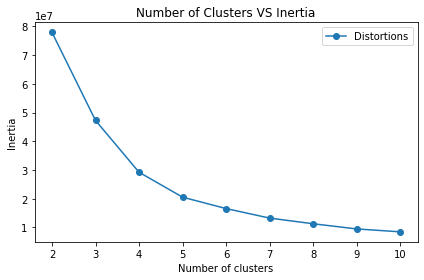

In [400]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 3.2 Silhouette Score

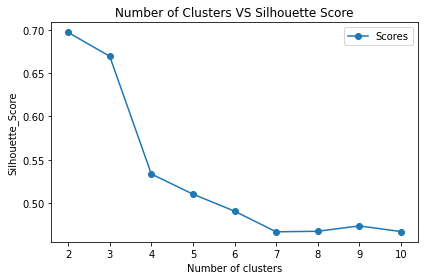

[0.6972646156059465, 0.6695939093799408, 0.5334614737117133, 0.510229299790784, 0.49052033908745246, 0.46661216405304523, 0.46726098023989066, 0.4734710175499172, 0.46688565664591797]
0.5305888284516231


In [401]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

## 4. Expectation Maximization Clustering

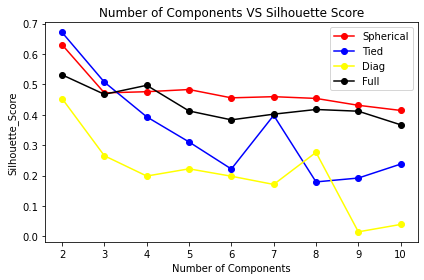

[0.6304922576342218, 0.4720171795433791, 0.4759272848120173, 0.4830791129569706, 0.45576190180406523, 0.45959215115864777, 0.45387194393816876, 0.431216758638695, 0.4143740693929356]
0.47514807331990006


In [402]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_one.append(silhouette_score(X, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_two.append(silhouette_score(X, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_three.append(silhouette_score(X, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_four.append(silhouette_score(X, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

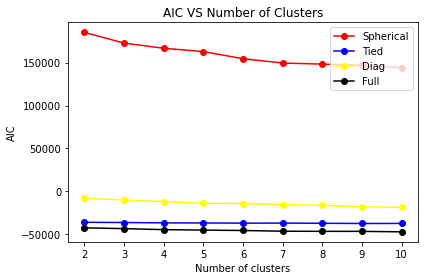

In [403]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    aic_scores_one.append(em.aic(X))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X)
    aic_scores_two.append(ems.aic(X))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X)
    aic_scores_three.append(emss.aic(X))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X)
    aic_scores_four.append(emsss.aic(X))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

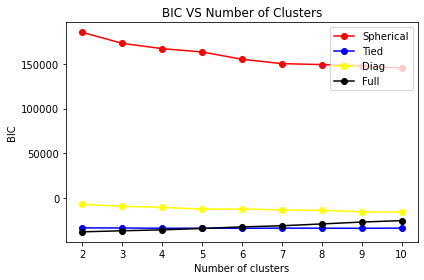

In [404]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    bic_scores_one.append(em.bic(X))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X)
    bic_scores_two.append(ems.bic(X))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X)
    bic_scores_three.append(emss.bic(X))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X)
    bic_scores_four.append(emsss.bic(X))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

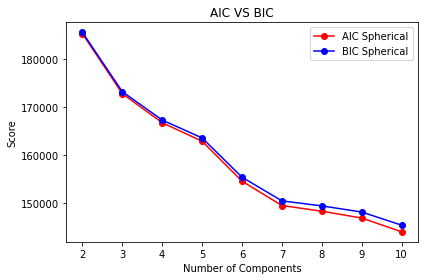

In [405]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    aic_s.append(em.aic(X))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    bic_s.append(em.bic(X))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 5. Dimensionality Reduction - PCA

### 5.1 PCA Fitting

In [406]:
pca = PCA(n_components=3, random_state=1)
X2 = pca.fit(X)
X2

PCA(n_components=3, random_state=1)

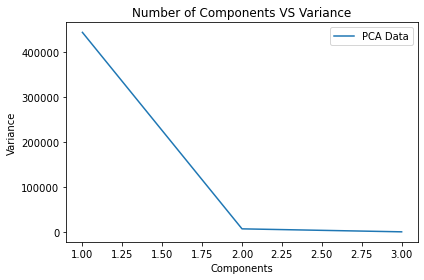

In [407]:
plt.plot(np.arange(1, X2.explained_variance_.size + 1), X2.explained_variance_, label='PCA Data')
plt.title("Number of Components VS Variance")
plt.xlabel('Components')
plt.ylabel('Variance')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

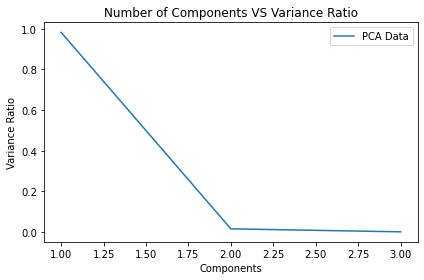

In [408]:
plt.plot(np.arange(1, X2.explained_variance_ratio_.size + 1), X2.explained_variance_ratio_, label='PCA Data')
plt.title("Number of Components VS Variance Ratio")
plt.xlabel('Components')
plt.ylabel('Variance Ratio')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

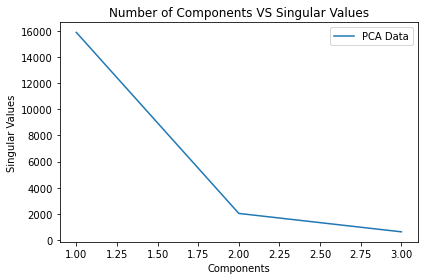

In [409]:
plt.plot(np.arange(1, X2.singular_values_.size + 1), X2.singular_values_, label='PCA Data')
plt.title("Number of Components VS Singular Values")
plt.xlabel('Components')
plt.ylabel('Singular Values')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

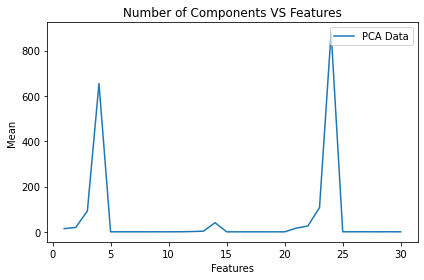

In [410]:
plt.plot(np.arange(1, X2.mean_.size + 1), X2.mean_, label='PCA Data')
plt.title("Number of Components VS Features")
plt.xlabel('Features')
plt.ylabel('Mean')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 5.2 PCA K-Mean Clustering

In [411]:
pca = PCA(n_components=7, random_state=1)
X2 = pca.fit_transform(X)
X2

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         3.20004861e+01,  1.26541481e+00,  9.31336973e-01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -4.33487404e+00, -2.25871776e-01, -4.60372215e-02],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
        -4.66529118e-01, -2.65281116e+00, -7.79744676e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
        -6.15621283e+00, -8.70725752e-01, -2.16649252e+00],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         3.56513324e+00,  4.08638995e+00, -1.70540138e+00],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -1.47175663e+01,  4.41812304e+00, -2.81575214e+00]])

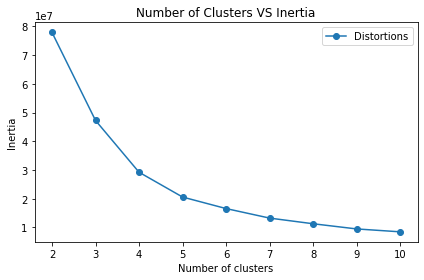

In [412]:
### 5.2 PCA K-Mean Clustering
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X2,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

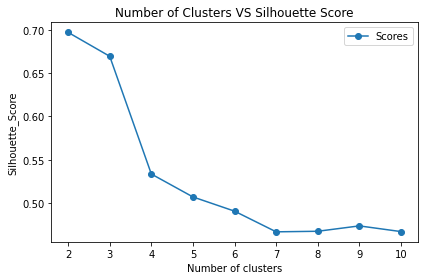

[0.6972666529963949, 0.6695964349711139, 0.5334685481563174, 0.5069679414035976, 0.4905299198426975, 0.4666268262552257, 0.4672752620068652, 0.4734888572903221, 0.46690368793175746]
0.5302360145393658


In [413]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X2)

    silhouette_avg = silhouette_score(X2, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 5.3 PCA Expectation Maximization Clustering

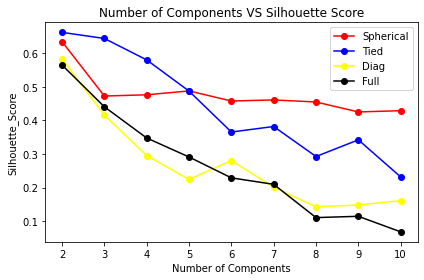

[0.6340704872083537, 0.47220153123309655, 0.4759368074540814, 0.487444791337536, 0.45748027928865415, 0.460605325535255, 0.45448269010466624, 0.42489235724220586, 0.42865147594471603]
0.4773073050387295


In [414]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_one.append(silhouette_score(X2, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_two.append(silhouette_score(X2, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_three.append(silhouette_score(X2, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_four.append(silhouette_score(X2, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

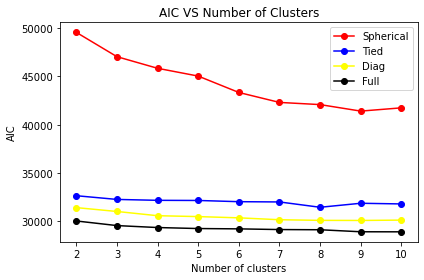

In [415]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    aic_scores_one.append(em.aic(X2))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X2)
    aic_scores_two.append(ems.aic(X2))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X2)
    aic_scores_three.append(emss.aic(X2))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X2)
    aic_scores_four.append(emsss.aic(X2))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

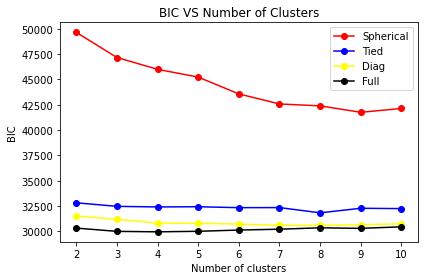

In [416]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    bic_scores_one.append(em.bic(X2))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X2)
    bic_scores_two.append(ems.bic(X2))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X2)
    bic_scores_three.append(emss.bic(X2))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X2)
    bic_scores_four.append(emsss.bic(X2))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

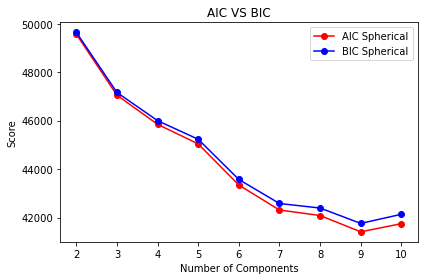

In [417]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    aic_s.append(em.aic(X2))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    bic_s.append(em.bic(X2))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 6. Dimensionality Reduction - ICA

### 6.1 ICA Fitting

In [732]:
ica = ICA(n_components=5, random_state=1)
X3 = ica.fit(X)
X3

FastICA(n_components=5, random_state=1)

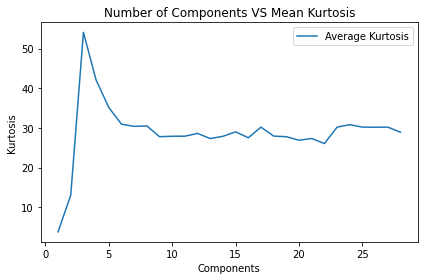

In [733]:
kurt = []
components = []

for i in range(1,29):
    ica.set_params(n_components=i)
    components.append(i)
    kurt.append(pd.DataFrame(ica.fit_transform(X)).kurt(axis=0).mean())

plt.plot(components, kurt, label='Average Kurtosis')
plt.title("Number of Components VS Mean Kurtosis")
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

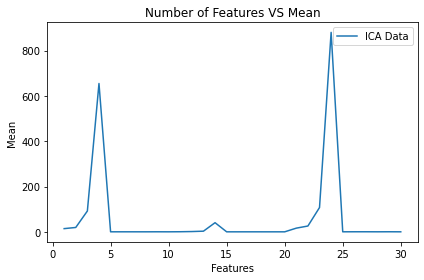

In [734]:
plt.plot(np.arange(1, X3.mean_.size + 1), X3.mean_, label='ICA Data')
plt.title("Number of Features VS Mean")
plt.xlabel('Features')
plt.ylabel('Mean')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

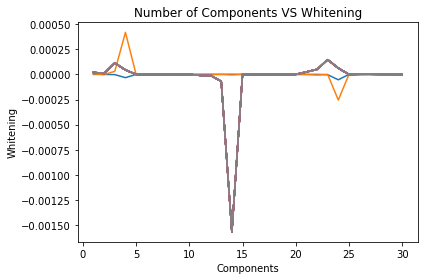

In [735]:
plt.plot(np.arange(1, X3.whitening_[0].size + 1), X3.whitening_[0])
plt.plot(np.arange(1, X3.whitening_[1].size + 1), X3.whitening_[1])
plt.plot(np.arange(1, X3.whitening_[2].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[3].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[4].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[5].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[6].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[7].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[8].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[9].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[10].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[11].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[12].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[13].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[14].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[15].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[16].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[17].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[18].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[19].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[20].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[21].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[22].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[23].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[24].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[25].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[26].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[27].size + 1), X3.whitening_[2])

plt.title("Number of Components VS Whitening")
plt.xlabel('Components')
plt.ylabel('Whitening')
plt.tight_layout()
plt.show()

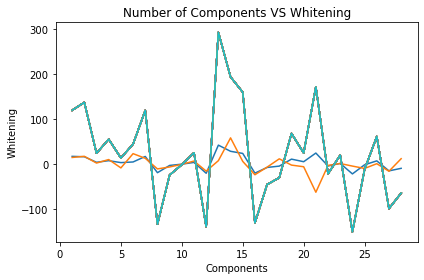

In [736]:
plt.plot(np.arange(1, X3.mixing_[0].size + 1), X3.mixing_[0])
plt.plot(np.arange(1, X3.mixing_[1].size + 1), X3.mixing_[1])
plt.plot(np.arange(1, X3.mixing_[2].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[3].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[4].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[5].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[6].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[7].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[8].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[9].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[10].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[11].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[12].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[13].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[14].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[15].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[16].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[17].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[18].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[19].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[20].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[21].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[22].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[23].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[24].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[25].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[26].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[27].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[28].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[29].size + 1), X3.mixing_[2])

plt.title("Number of Components VS Whitening")
plt.xlabel('Components')
plt.ylabel('Whitening')
plt.tight_layout()
plt.show()

### 6.2 ICA K-Mean Clustering

In [737]:
ica = ICA(n_components=5,random_state=1)
X3 = ica.fit_transform(X)
X3

array([[ 0.12461679,  0.00179036, -0.07766411, -0.18382452, -0.15599207],
       [ 0.0609986 ,  0.01994106,  0.02282778,  0.12125712, -0.03669515],
       [ 0.03141148, -0.02291769, -0.02063768,  0.0496862 , -0.02194622],
       ...,
       [-0.01460639, -0.00401102, -0.05273543,  0.0188466 ,  0.05092255],
       [-0.00663293,  0.00502775, -0.15542654, -0.01878074,  0.01710041],
       [ 0.02279481, -0.00673761,  0.07272725, -0.01153191,  0.0972792 ]])

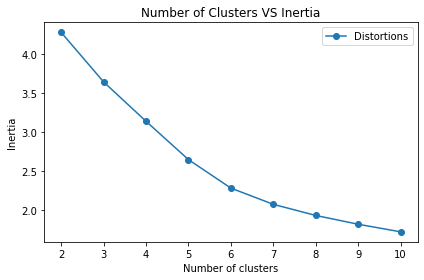

In [738]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X3,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

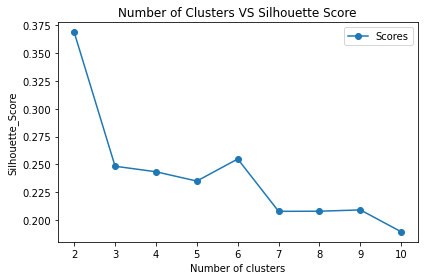

[0.3684678326342155, 0.2484167187828709, 0.24345315069505571, 0.23510529379261055, 0.25492668771599375, 0.2079642812651702, 0.20806937448084198, 0.2092322403266928, 0.18958682832004253]
0.2405802675570549


In [739]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X3)

    silhouette_avg = silhouette_score(X3, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 6.3 PCA Expectation Maximization Clustering

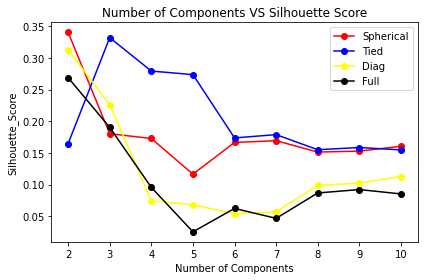

[0.34038335003787096, 0.1803438054430935, 0.17284649910766575, 0.11654617166329309, 0.166555150360537, 0.1694158827852755, 0.15137972520302975, 0.1528952226717032, 0.16049096674754407]
0.17898408600222362


In [740]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_one.append(silhouette_score(X3, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_two.append(silhouette_score(X3, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_three.append(silhouette_score(X3, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_four.append(silhouette_score(X3, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

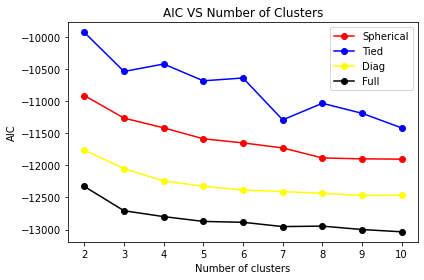

In [741]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    aic_scores_one.append(em.aic(X3))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X3)
    aic_scores_two.append(ems.aic(X3))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X3)
    aic_scores_three.append(emss.aic(X3))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X3)
    aic_scores_four.append(emsss.aic(X3))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

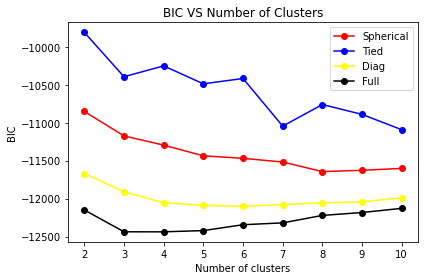

In [742]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    bic_scores_one.append(em.bic(X3))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X3)
    bic_scores_two.append(ems.bic(X3))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X3)
    bic_scores_three.append(emss.bic(X3))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X3)
    bic_scores_four.append(emsss.bic(X3))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

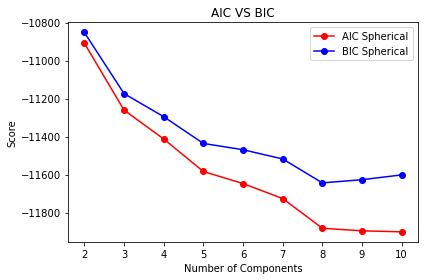

In [743]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    aic_s.append(em.aic(X3))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    bic_s.append(em.bic(X3))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## 7. Dimensionality Reduction - RP

### 7.1 RP Fitting

In [593]:
rp = RP(n_components=7, random_state=1)
X4 = rp.fit(X)
X4

GaussianRandomProjection(n_components=7, random_state=1)

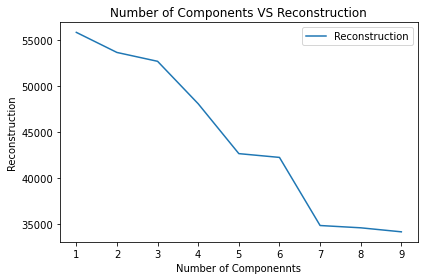

In [594]:
error = []
for i in range(1,10):
    randomized_projection = RP(n_components=i, random_state=1).fit(X)
    transformed_data = randomized_projection.transform(X)
    inverse_data = np.linalg.pinv(randomized_projection.components_.T)
    reconstructed_data = transformed_data.dot(inverse_data)
    error.append(mean_squared_error(X, reconstructed_data))

plt.plot(range(1,10), error, label='Reconstruction')
plt.title("Number of Components VS Reconstruction")
plt.xlabel('Number of Componennts')
plt.ylabel('Reconstruction')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 7.2 RP K-Mean Clustering

In [595]:
rp = RP(n_components=7, random_state=1)
X4 = rp.fit_transform(X)
X4

array([[  -2.24493941, -607.76292118,  284.16768097, ..., 1459.00025329,
         833.77988207, 2029.39300896],
       [-141.94830809, -746.8221915 ,  213.92869501, ..., 1662.46486865,
        1091.06855695, 2114.09264067],
       [-143.46388495, -659.66620266,  196.96800205, ..., 1500.20005899,
        1001.34045073, 1882.9439035 ],
       ...,
       [-110.58588168, -486.28878415,  127.82123111, ..., 1047.86163283,
         741.04407698, 1269.34656398],
       [-134.4135874 , -719.17051816,  211.23218832, ..., 1588.24344982,
        1074.25899848, 1992.69202899],
       [  -7.49458849, -128.77149602,   47.18160023, ...,  246.6099765 ,
         181.80981936,  300.77349435]])

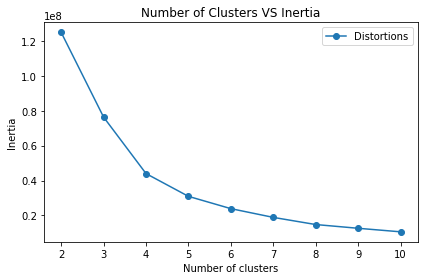

In [596]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X4,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

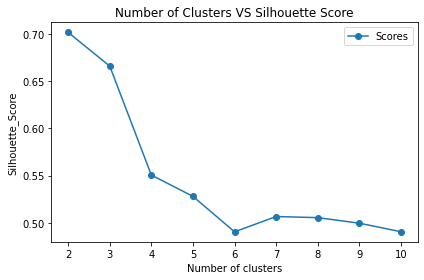

[0.7018807691659392, 0.6661385479242746, 0.5505584566449264, 0.5279903256031906, 0.4903582521563575, 0.5065948868225697, 0.5053893676265161, 0.49952553150739926, 0.49043856763905114]
0.5487638561211362


In [597]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X4)

    silhouette_avg = silhouette_score(X4, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 7.3 RP Expectation Maximization Clustering

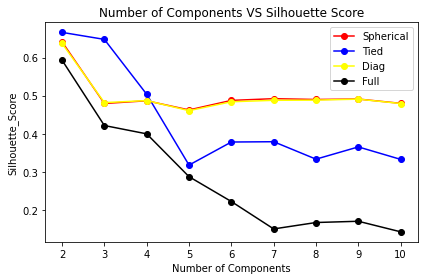

[0.6413201394123786, 0.47937225028309727, 0.4865531005184026, 0.4624750446809454, 0.4875070780751111, 0.4920306016328889, 0.48992078960948193, 0.4910934533328799, 0.47979314661561545]
0.5011184004623113


In [598]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_one.append(silhouette_score(X4, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_two.append(silhouette_score(X4, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_three.append(silhouette_score(X4, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_four.append(silhouette_score(X4, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

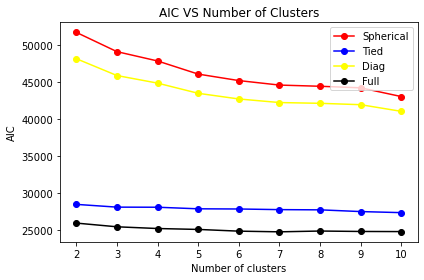

In [599]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    aic_scores_one.append(em.aic(X4))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X4)
    aic_scores_two.append(ems.aic(X4))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X4)
    aic_scores_three.append(emss.aic(X4))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X4)
    aic_scores_four.append(emsss.aic(X4))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

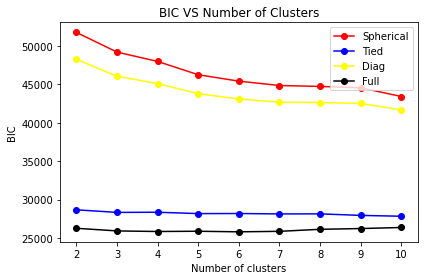

In [600]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    bic_scores_one.append(em.bic(X4))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X4)
    bic_scores_two.append(ems.bic(X4))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X4)
    bic_scores_three.append(emss.bic(X4))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X4)
    bic_scores_four.append(emsss.bic(X4))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

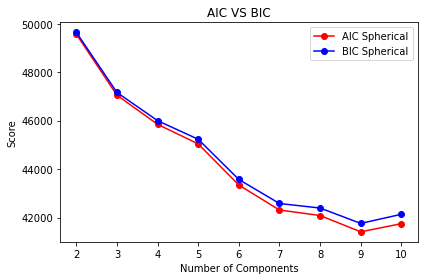

In [601]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    aic_s.append(em.aic(X2))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    bic_s.append(em.bic(X2))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 8. Dimensionality Reduction - SVD

### 8.1 SVD Fitting

In [602]:
svd = SVD(n_components=5, random_state=1)
X5 = svd.fit(X)
X5

TruncatedSVD(n_components=5, random_state=1)

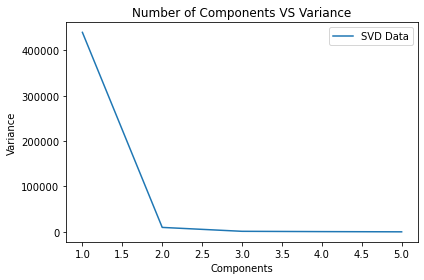

In [603]:
plt.plot(np.arange(1, X5.explained_variance_.size + 1), X5.explained_variance_, label='SVD Data')
plt.title("Number of Components VS Variance")
plt.xlabel('Components')
plt.ylabel('Variance')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

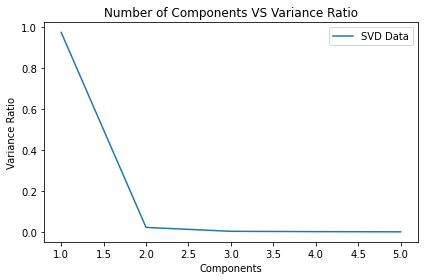

In [604]:
plt.plot(np.arange(1, X5.explained_variance_ratio_.size + 1), X5.explained_variance_ratio_, label='SVD Data')
plt.title("Number of Components VS Variance Ratio")
plt.xlabel('Components')
plt.ylabel('Variance Ratio')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

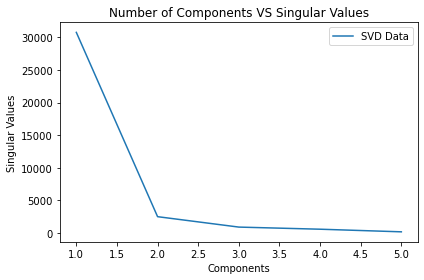

In [605]:
plt.plot(np.arange(1, X5.singular_values_.size + 1), X5.singular_values_, label='SVD Data')
plt.title("Number of Components VS Singular Values")
plt.xlabel('Components')
plt.ylabel('Singular Values')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 8.2 SVD K-Mean Clustering

In [606]:
svd = SVD(n_components=5, random_state=1)
X5 = svd.fit_transform(X)
X5

array([[ 2.24197428e+03,  3.47715560e+02, -2.75374194e+01,
         5.98014980e+01,  2.79839562e+01],
       [ 2.37240840e+03,  5.69016699e+01,  2.38631619e+01,
        -4.85640643e+01,  1.15594993e+00],
       [ 2.10184028e+03,  1.19476274e+01,  3.04113860e+01,
        -1.20712476e+01,  7.96227373e-01],
       ...,
       [ 1.42453281e+03, -5.50217124e+01, -3.57943510e+00,
        -5.71453172e+00, -8.90941023e+00],
       [ 2.23165579e+03,  1.99943985e+01,  3.31619182e+00,
        -1.12704828e+01, -4.22533880e+00],
       [ 3.31693026e+02, -5.29733966e+00, -3.91213644e+01,
         3.15545363e+01, -1.30217089e+01]])

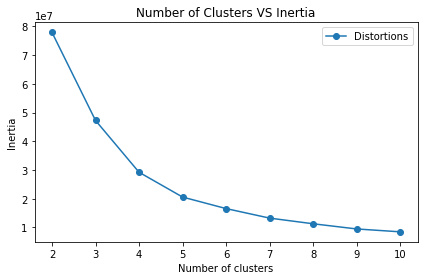

In [607]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X5,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

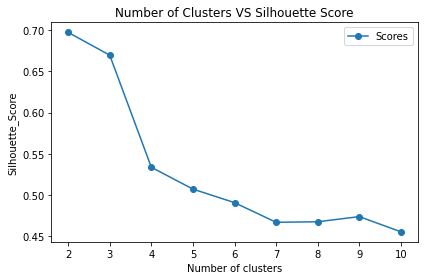

[0.6972908707220717, 0.6696268444624431, 0.5335513278591877, 0.5070777653764763, 0.4906499455910533, 0.46678872943069866, 0.467436080194835, 0.47368888089218586, 0.4552252594502746]
0.5290373004421363


In [608]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X5)

    silhouette_avg = silhouette_score(X5, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 8.3 SVD Expectation Maximization Clustering

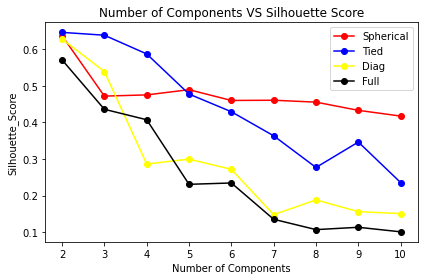

[0.6374441735552648, 0.47216381042906236, 0.4754738937900845, 0.4897108829580806, 0.46025102917996047, 0.4608478440793735, 0.4556619057372505, 0.43321461020838087, 0.41751115983029446]
0.47803103441863914


In [609]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_one.append(silhouette_score(X5, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_two.append(silhouette_score(X5, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_three.append(silhouette_score(X5, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_four.append(silhouette_score(X5, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

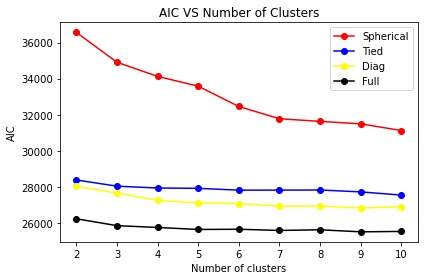

In [610]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    aic_scores_one.append(em.aic(X5))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X5)
    aic_scores_two.append(ems.aic(X5))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X5)
    aic_scores_three.append(emss.aic(X5))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X5)
    aic_scores_four.append(emsss.aic(X5))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

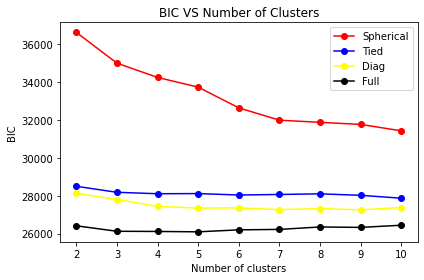

In [611]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    bic_scores_one.append(em.bic(X5))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X5)
    bic_scores_two.append(ems.bic(X5))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X5)
    bic_scores_three.append(emss.bic(X5))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X5)
    bic_scores_four.append(emsss.bic(X5))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

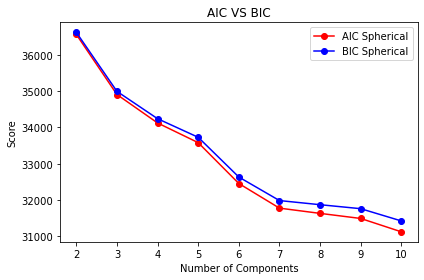

In [612]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    aic_s.append(em.aic(X5))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    bic_s.append(em.bic(X5))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## 9. Neural Network - Dimensionality Reduction Algorithms

### 9.1 Neural Network with PCA

In [721]:
pca = PCA(n_components=5, random_state=1)
X2 = pca.fit_transform(X)
X2

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01,
        -8.71197531e+00,  3.20004861e+01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01,
         1.78612832e+01, -4.33487404e+00],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00,
         4.19934010e+00, -4.66529118e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01,
        -9.77188104e+00, -6.15621283e+00],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01,
        -2.36608814e+01,  3.56513324e+00],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01,
         2.54724855e+00, -1.47175663e+01]])

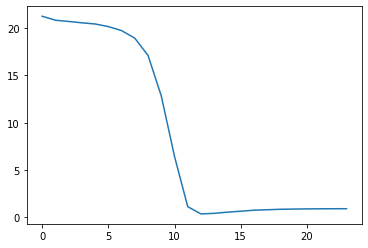

In [722]:
X_train,X_test,y_train,y_test = train_test_split(X2, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [723]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timepca = t2 - t1

y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],169,10
True[1],10,96


In [724]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       179
           1       0.91      0.91      0.91       106

    accuracy                           0.93       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



In [725]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 20
Accuracy: 0.930
Precision: 0.906
Recall: 0.906
F1: 0.906


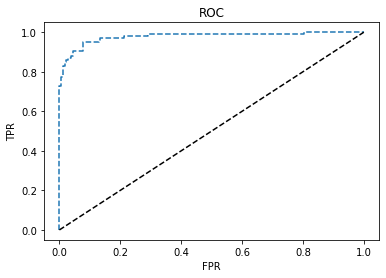

In [726]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [727]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.944 +/- 0.020


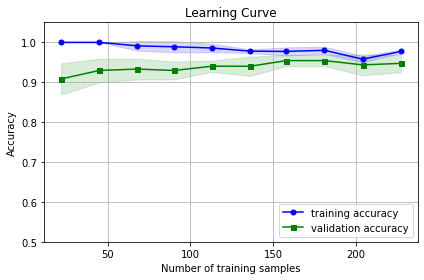

In [728]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_pca = []
test_mean_pca.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

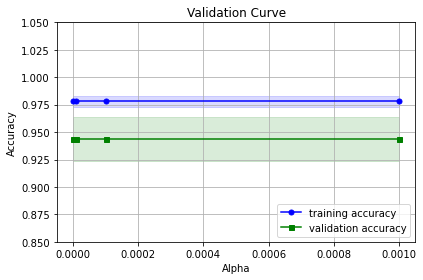

In [729]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [730]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 2.299
Best Score: 0.944
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (10, 10)}


In [710]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],166,13
True[1],6,100


In [569]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       179
           1       0.88      0.94      0.91       106

    accuracy                           0.93       285
   macro avg       0.93      0.94      0.93       285
weighted avg       0.94      0.93      0.93       285



In [570]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 19
Accuracy: 0.933
Precision: 0.885
Recall: 0.943
F1: 0.913


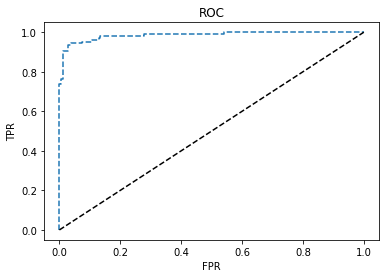

In [571]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [572]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.954 +/- 0.033


### 9.2 Neural Network with ICA

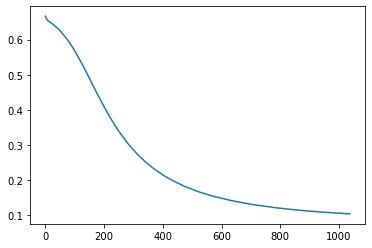

In [744]:
X_train,X_test,y_train,y_test = train_test_split(X3, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [745]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timeica = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

C:\Users\wonpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predict[0],Predict[1]
True[0],175,4
True[1],13,93


In [746]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       179
           1       0.96      0.88      0.92       106

    accuracy                           0.94       285
   macro avg       0.94      0.93      0.93       285
weighted avg       0.94      0.94      0.94       285



In [747]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 17
Accuracy: 0.940
Precision: 0.959
Recall: 0.877
F1: 0.916


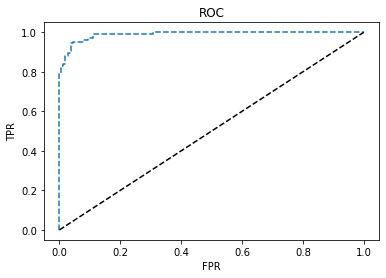

In [748]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [749]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.954 +/- 0.028


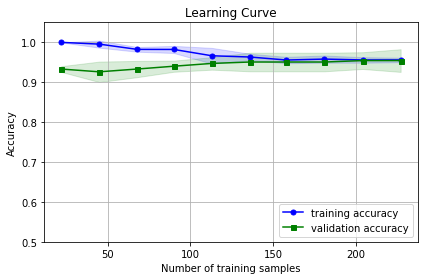

In [750]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_ica = []
test_mean_ica.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

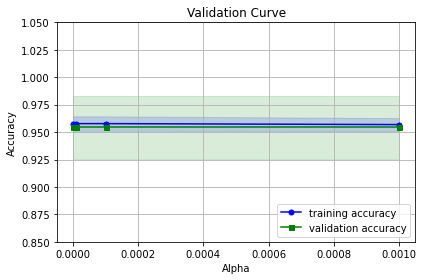

In [751]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [752]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 2.970
Best Score: 0.958
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (10, 10)}


In [753]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],174,5
True[1],14,92


In [754]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       179
           1       0.95      0.87      0.91       106

    accuracy                           0.93       285
   macro avg       0.94      0.92      0.93       285
weighted avg       0.93      0.93      0.93       285



In [755]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 19
Accuracy: 0.933
Precision: 0.948
Recall: 0.868
F1: 0.906


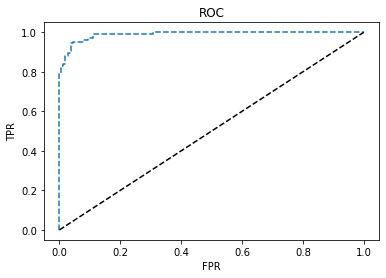

In [756]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [757]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.958 +/- 0.032


### 9.3 Neural Network with RP

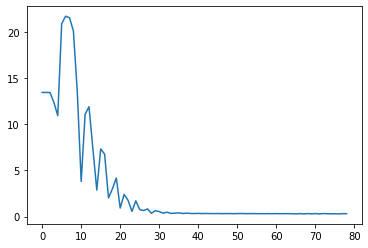

In [613]:
X_train,X_test,y_train,y_test = train_test_split(X4, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [614]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timerp = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],166,13
True[1],16,90


In [615]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       179
           1       0.87      0.85      0.86       106

    accuracy                           0.90       285
   macro avg       0.89      0.89      0.89       285
weighted avg       0.90      0.90      0.90       285



In [616]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 29
Accuracy: 0.898
Precision: 0.874
Recall: 0.849
F1: 0.861


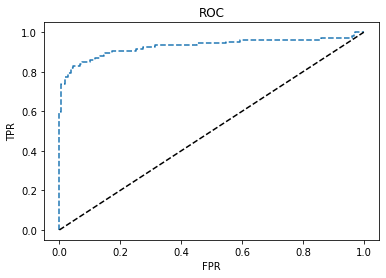

In [617]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [618]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.926 +/- 0.030


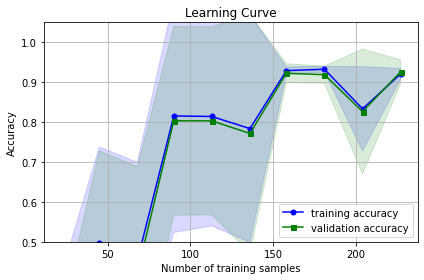

In [619]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_rp = []
test_mean_rp.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

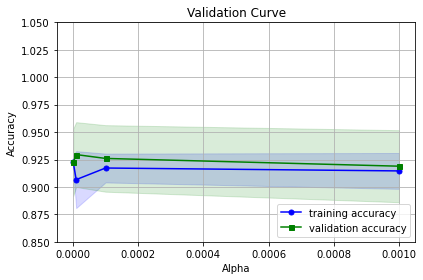

In [620]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [621]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 0.706
Best Score: 0.933
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (5, 10)}


In [622]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],173,6
True[1],20,86


In [623]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       179
           1       0.93      0.81      0.87       106

    accuracy                           0.91       285
   macro avg       0.92      0.89      0.90       285
weighted avg       0.91      0.91      0.91       285



In [624]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 26
Accuracy: 0.909
Precision: 0.935
Recall: 0.811
F1: 0.869


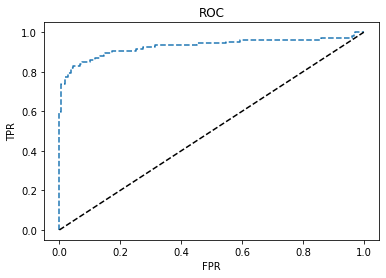

In [625]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [626]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.933 +/- 0.026


### 9.4 Neural Network with SVD

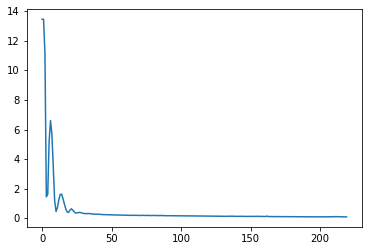

In [758]:
X_train,X_test,y_train,y_test = train_test_split(X5, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [759]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timesvd = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],171,8
True[1],16,90


In [760]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       179
           1       0.92      0.85      0.88       106

    accuracy                           0.92       285
   macro avg       0.92      0.90      0.91       285
weighted avg       0.92      0.92      0.92       285



In [761]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 24
Accuracy: 0.916
Precision: 0.918
Recall: 0.849
F1: 0.882


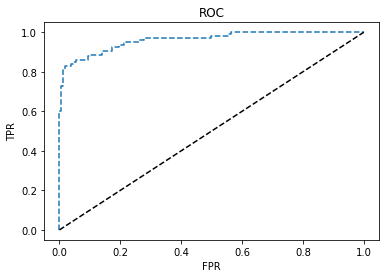

In [762]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [763]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.940 +/- 0.033


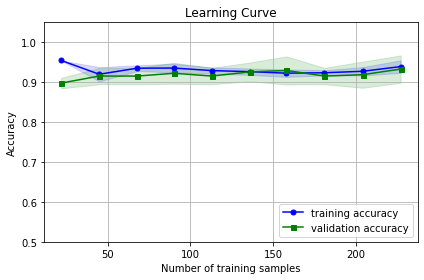

In [764]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_svd = []
test_mean_svd.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

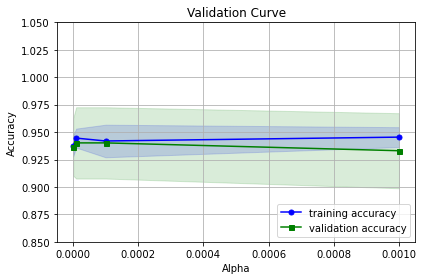

In [765]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [766]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 3.126
Best Score: 0.922
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (10, 5)}


In [767]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],172,7
True[1],15,91


In [768]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       179
           1       0.93      0.86      0.89       106

    accuracy                           0.92       285
   macro avg       0.92      0.91      0.92       285
weighted avg       0.92      0.92      0.92       285



In [769]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 22
Accuracy: 0.923
Precision: 0.929
Recall: 0.858
F1: 0.892


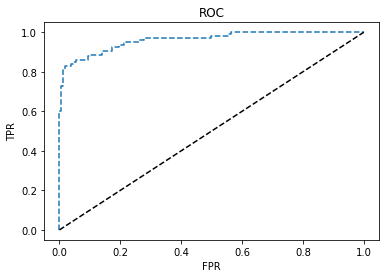

In [770]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [771]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.922 +/- 0.031


In [657]:
print ("PCA Fit Time: ", timepca)
print ("ICA Fit Time: ", timeica)
print ("RP Fit Time: ", timerp)
print ("SVD Fit Time: ", timesvd)

PCA Fit Time:  0.377178430557251
ICA Fit Time:  1.2927284240722656
RP Fit Time:  0.1266629695892334
SVD Fit Time:  0.3944110870361328


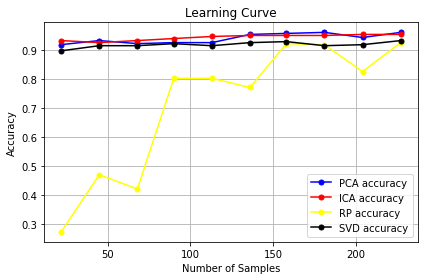

In [658]:
plt.plot(train_sizes, np.array(test_mean_pca[0]), color='blue', marker='o',markersize=5, label='PCA accuracy')
plt.plot(train_sizes, np.array(test_mean_ica[0]), color='red', marker='o',markersize=5, label='ICA accuracy')
plt.plot(train_sizes, np.array(test_mean_rp[0]), color='yellow', marker='o',markersize=5, label='RP accuracy')
plt.plot(train_sizes, np.array(test_mean_svd[0]), color='black', marker='o',markersize=5, label='SVD accuracy')

plt.grid()
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.tight_layout()
plt.show()

## 10. Neural Network - Clustering Algorithms

## 10.1 PCA with KM and EM

In [990]:
df = pd.DataFrame(X2)
km = KMeans(n_clusters=4, random_state=1).fit(df)
km_labels = km.labels_
df['KM'] = km_labels

em = GaussianMixture(n_components=7,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
em_labels = em.fit_predict(X2)
df['EM'] = em_labels


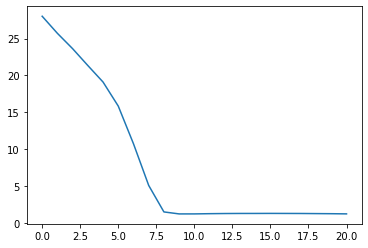

In [991]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [992]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timepcas = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],175,4
True[1],10,96


In [993]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       179
           1       0.96      0.91      0.93       106

    accuracy                           0.95       285
   macro avg       0.95      0.94      0.95       285
weighted avg       0.95      0.95      0.95       285



In [994]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 14
Accuracy: 0.951
Precision: 0.960
Recall: 0.906
F1: 0.932


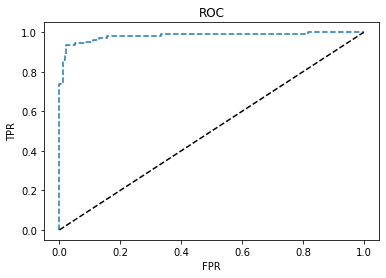

In [995]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [996]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.961 +/- 0.013


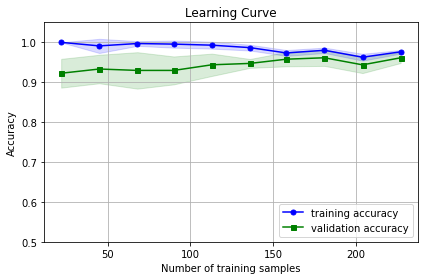

In [997]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_pcas = []
test_mean_pcas.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

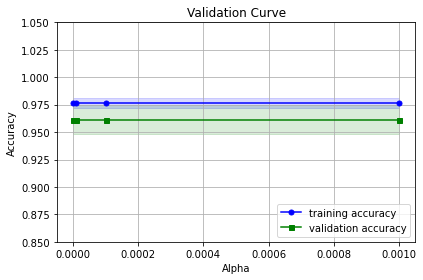

In [998]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [999]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 4.044
Best Score: 0.940
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (10, 5)}


In [943]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

C:\Users\wonpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predict[0],Predict[1]
True[0],173,6
True[1],10,96


In [829]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       179
           1       0.94      0.86      0.90       106

    accuracy                           0.93       285
   macro avg       0.93      0.91      0.92       285
weighted avg       0.93      0.93      0.93       285



In [830]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 21
Accuracy: 0.926
Precision: 0.938
Recall: 0.858
F1: 0.897


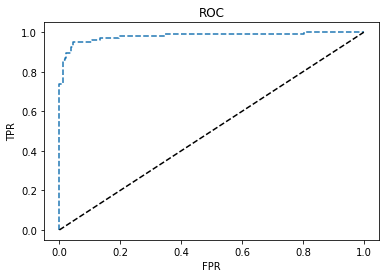

In [831]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [832]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.933 +/- 0.028


## 10.2 ICA with KM and EM

In [954]:
df = pd.DataFrame(X3)
km = KMeans(n_clusters=5, random_state=1).fit(df)
km_labels = km.labels_
df['KM'] = km_labels

em = GaussianMixture(n_components=5,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
em_labels = em.fit_predict(X3)
df['EM'] = em_labels

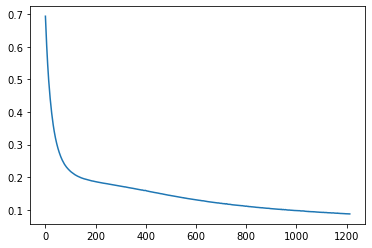

In [955]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [956]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timeicas = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

C:\Users\wonpe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predict[0],Predict[1]
True[0],169,10
True[1],11,95


In [957]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       179
           1       0.90      0.90      0.90       106

    accuracy                           0.93       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



In [958]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 21
Accuracy: 0.926
Precision: 0.905
Recall: 0.896
F1: 0.900


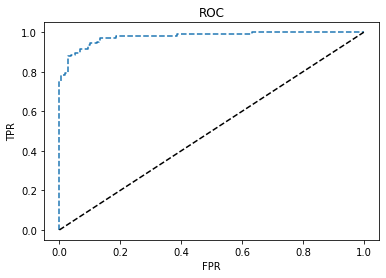

In [959]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [960]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.937 +/- 0.021


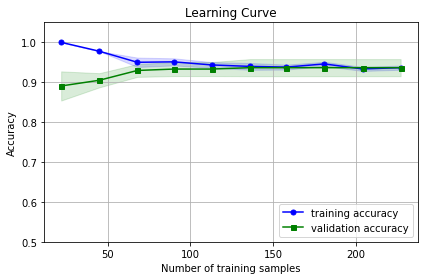

In [961]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_icas = []
test_mean_icas.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

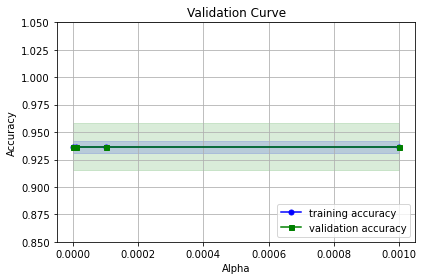

In [962]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [969]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 3.401
Best Score: 0.937
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (5, 5)}


In [964]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],166,13
True[1],12,94


In [965]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       179
           1       0.88      0.89      0.88       106

    accuracy                           0.91       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285



In [966]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 25
Accuracy: 0.912
Precision: 0.879
Recall: 0.887
F1: 0.883


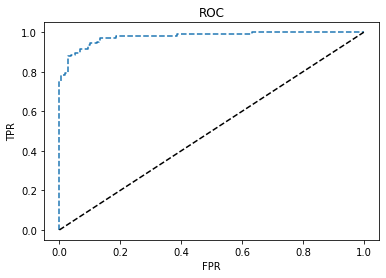

In [967]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [968]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.937 +/- 0.021


## 10.3 RP with KM and EM

In [901]:
df = pd.DataFrame(X4)
km = KMeans(n_clusters=4, random_state=1).fit(df)
km_labels = km.labels_
df['KM'] = km_labels

em = GaussianMixture(n_components=9,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
em_labels = em.fit_predict(X4)
df['EM'] = em_labels


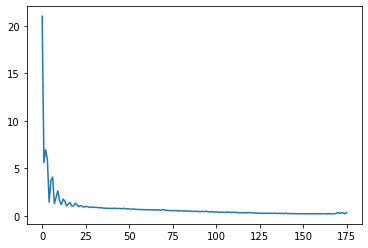

In [902]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [903]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timerps = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],159,20
True[1],11,95


In [904]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       179
           1       0.83      0.90      0.86       106

    accuracy                           0.89       285
   macro avg       0.88      0.89      0.89       285
weighted avg       0.89      0.89      0.89       285



In [905]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 31
Accuracy: 0.891
Precision: 0.826
Recall: 0.896
F1: 0.860


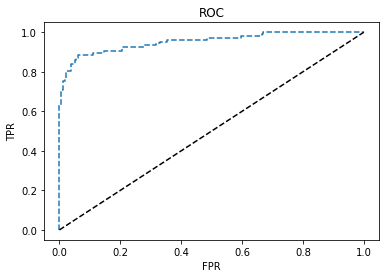

In [906]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [907]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.873 +/- 0.057


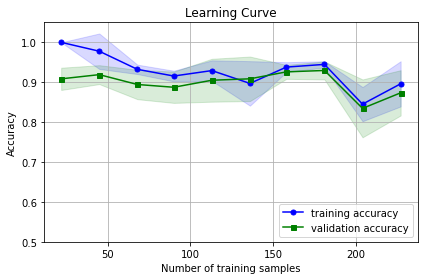

In [908]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_rps = []
test_mean_rps.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

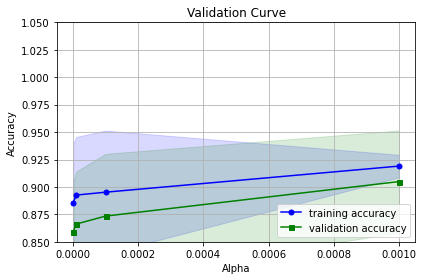

In [909]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [910]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 1.269
Best Score: 0.919
Best Parameter: {'alpha': 1e-06, 'hidden_layer_sizes': (5, 10)}


In [911]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],159,20
True[1],13,93


In [912]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       179
           1       0.82      0.88      0.85       106

    accuracy                           0.88       285
   macro avg       0.87      0.88      0.88       285
weighted avg       0.89      0.88      0.88       285



In [913]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 33
Accuracy: 0.884
Precision: 0.823
Recall: 0.877
F1: 0.849


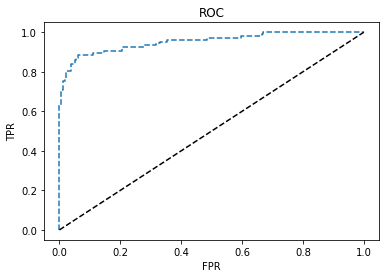

In [914]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [915]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.919 +/- 0.028


## 10.4 SVD with KM and EM

In [916]:
df = pd.DataFrame(X5)
km = KMeans(n_clusters=5, random_state=1).fit(df)
km_labels = km.labels_
df['KM'] = km_labels

em = GaussianMixture(n_components=7,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
em_labels = em.fit_predict(X5)
df['EM'] = em_labels

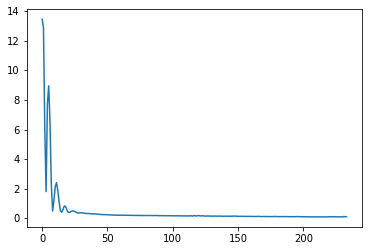

In [917]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=0.5, random_state=1, stratify=y)
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(X_train,y_train)
plt.plot(mlp.loss_curve_)

In [918]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
t1 = time.time()
mlp.fit(X_train, y_train)
t2 = time.time()
timesvds = t2 - t1
y_pred = mlp.predict(X_test)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat

,Predict[0],Predict[1]
True[0],169,10
True[1],14,92


In [919]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       179
           1       0.90      0.87      0.88       106

    accuracy                           0.92       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.92      0.92      0.92       285



In [920]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 24
Accuracy: 0.916
Precision: 0.902
Recall: 0.868
F1: 0.885


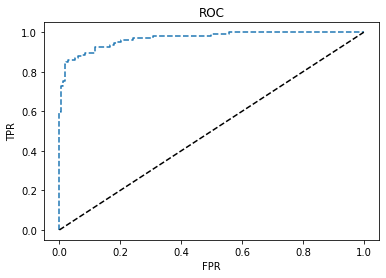

In [921]:
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [922]:
# Cross Validation
scores = cross_validate(estimator=mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.922 +/- 0.021


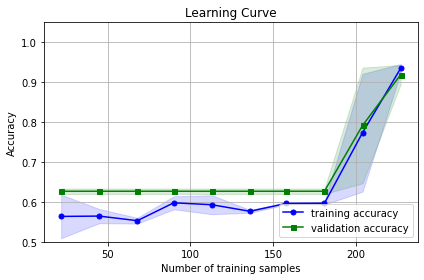

In [923]:
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean_svds = []
test_mean_svds.append(test_mean)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.show()

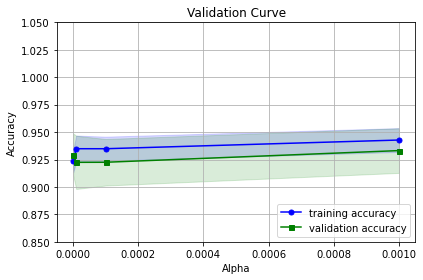

In [924]:
# Validation Curve

param_range=[1e-06, 1e-05, 0.0001, 0.001]

train_scores, test_scores = validation_curve(estimator=mlp, X=X_train, y=y_train, param_name='alpha',param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.ylim([0.85, 1.05])
plt.tight_layout()
plt.show()

In [925]:
# Hyperparameter Tuning
param_range1=[(5,5),(5,10),(10,5),(10,10)]
param_range2=[1e-06, 1e-05, 0.0001, 0.001]

param_grid = [{'hidden_layer_sizes': param_range1, 'alpha': param_range2}]

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)

t1 = time.time()
gs = gs.fit(X_train, y_train)
t2 = time.time()
t3 = t2 - t1

print('Training Time: %.3f' % t3)
print('Best Score: %.3f' % gs.best_score_)
print('Best Parameter:', gs.best_params_)

Training Time: 2.899
Best Score: 0.929
Best Parameter: {'alpha': 1e-05, 'hidden_layer_sizes': (10, 5)}


In [926]:
# Verifying Optimal Model
best_mlp = gs.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)
confusion_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['True[0]', 'True[1]'], columns = ['Predict[0]', 'Predict[1]'])
confusion_mat2

,Predict[0],Predict[1]
True[0],167,12
True[1],17,89


In [927]:
# Classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       179
           1       0.88      0.84      0.86       106

    accuracy                           0.90       285
   macro avg       0.89      0.89      0.89       285
weighted avg       0.90      0.90      0.90       285



In [928]:
print ('Wrong Categorized Sample: %d' % (y_test != y_pred).sum())
print ('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print ('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print ('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print ('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Wrong Categorized Sample: 29
Accuracy: 0.898
Precision: 0.881
Recall: 0.840
F1: 0.860


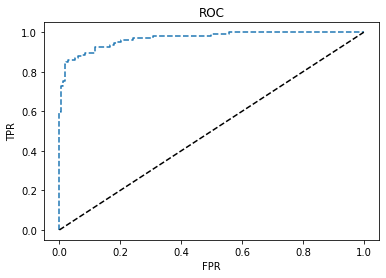

In [929]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--')
plt.plot([0,1],[0,1],'k--')
plt.plot([fpr],[tpr],'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [930]:
# Cross Validation
scores = cross_validate(estimator=best_mlp, X=X_train, y=y_train,scoring=['accuracy'], cv=5, n_jobs=-1, return_train_score=False)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']),np.std(scores['test_accuracy'])))

CV accuracy: 0.929 +/- 0.025


In [931]:
print ("PCA Fit Time: ", timepcas)
print ("ICA Fit Time: ", timeicas)
print ("RP Fit Time: ", timerps)
print ("SVD Fit Time: ", timesvds)

PCA Fit Time:  0.5225741863250732
ICA Fit Time:  1.3349964618682861
RP Fit Time:  0.15375208854675293
SVD Fit Time:  0.06382918357849121


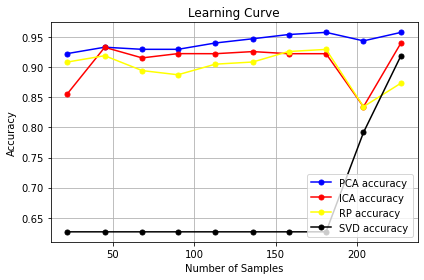

In [932]:
plt.plot(train_sizes, np.array(test_mean_pcas[0]), color='blue', marker='o',markersize=5, label='PCA accuracy')
plt.plot(train_sizes, np.array(test_mean_icas[0]), color='red', marker='o',markersize=5, label='ICA accuracy')
plt.plot(train_sizes, np.array(test_mean_rps[0]), color='yellow', marker='o',markersize=5, label='RP accuracy')
plt.plot(train_sizes, np.array(test_mean_svds[0]), color='black', marker='o',markersize=5, label='SVD accuracy')

plt.grid()
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.tight_layout()
plt.show()